In [1]:
import matplotlib.pyplot as plt
import numpy as np
import segmentation_models_pytorch as smp
import torch
import xarray

from levee_hunter.augmentations import TRANSFORMS
from levee_hunter.modeling.inference import infer
from levee_hunter.modeling.metrics import custom_metrics, plot_skeletons
from levee_hunter.processing.dataset_images_choice import interactive_images_selection

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:16: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:19: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(
/share/gpu5/pmucha/fathom/levee-hu

In [2]:
from levee_hunter.processing.helpers import specify_helper

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model = smp.Segformer(
    encoder_name="mit_b0",      # Use the MIT-B0 encoder for SegFormer
    encoder_weights="imagenet", # Pretrained on ImageNet
    in_channels=1,              # Input channels (e.g. grayscale images)
    classes=1                   # Number of output classes
).to(device)
model.load_state_dict(torch.load("../models/1m_1024_old/Segformer-b0_old.pth"))

helper = specify_helper(helper_name="model_helper_custom_metrics", third_arg=model)

Image passed overlap check.
Progress: 1/6736 

Currently Processing: ../data/intermediate/1m_1024/images/USGS_1M_15_x32y439_MO_Northern_SEMO_2021_D21_p7.tif


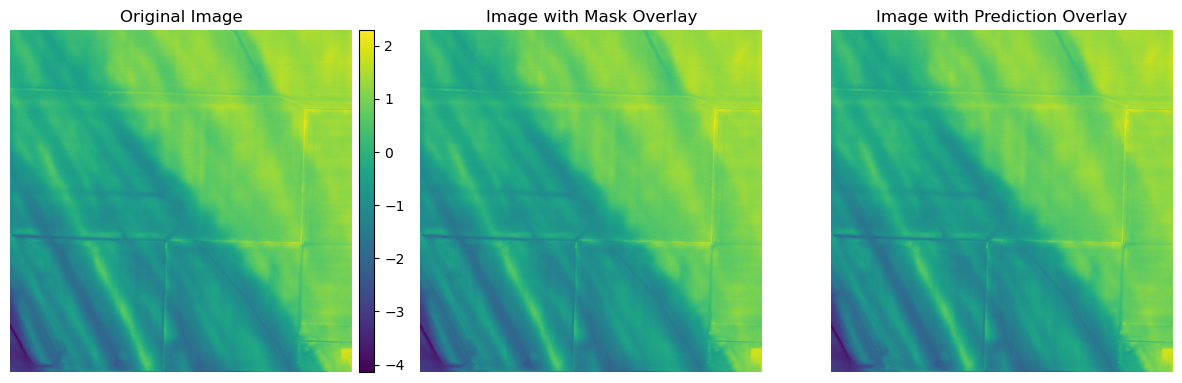

-----------------------Custom Metrics-----------------------
IoU Score:         nan
F1 Score (Dice):   nan
Recall:            1.0000
------------------------------------------------------------
TP: 0, FP: 0.0, FN: 0
------------------------------------------------------------


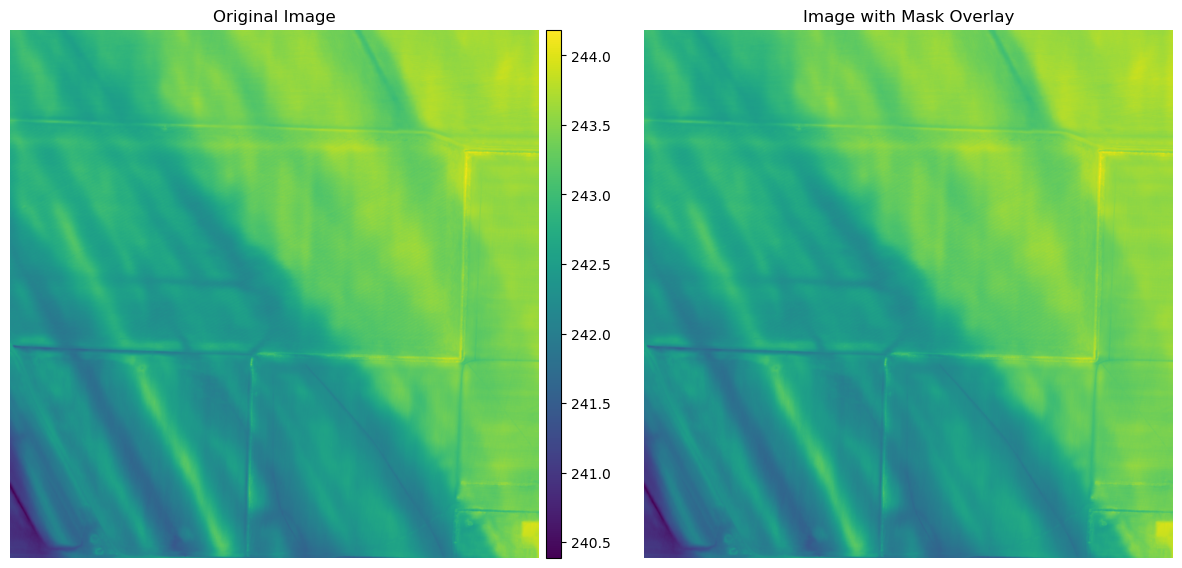

In [4]:
# please note, the dilation_size is only for visualisation.
interactive_images_selection(
    intermediate_data_path="../data/intermediate/1m_1024",
    output_dir='../data/processed/1m_1024', 
    dilation_size=7,         # for visualisation only, choose your preference
    figsize=(15, 9),         # for visualisation only
    cmap='viridis',          # for visualisation only
    plot_types=['image', 'image_mask_overlay'],       # for visualisation only
    file_ids_toprocess=None,
    powernorm_threshold=40,  # for visualisation only
    store_bad_bounds=True,
    helper=helper,
    )

    #10080